In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None #So that Dataframe outputs dont hide any columns
#pd.options.display.max_rows = 1000

In [2]:
#Loading the Datasets
season_stats_20_21 = pd.read_excel('FPL_2020-2021_agg_stats.xlsx')
season_stats_19_20 = pd.read_csv('FPL_2019_2020_weekly_stats.csv')
season_19_20_postions = pd.read_excel('fpl_2019-2020_position_xgstats.xlsx')
season_xgstats_20_21 = pd.read_excel('fpl_2020-2021_xgstats.xlsx')

In [3]:
#adding xG and xA to season_stats_20_21 dataframe
season_stats_20_21['xG'] = season_xgstats_20_21['xG']
season_stats_20_21['xA'] = season_xgstats_20_21['xA']

In [4]:
season_stats_20_21

,team,id,first_name,second_name,web_name,element_type,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,influence_rank,influence_rank_type,creativity_rank,threat_rank,ict_index,ict_index_rank,status,total_points,points_per_game,bonus,bps,dreamteam_count,selected_by_percent,xG,xA
0,1,1,Mesut,Özil,Özil,3,0,0,0,0,0,0,0,0,0,0,6.7,0.0,0.0,0.0,713,295,713,713,0.0,713,u,0,0.0,0,0,0,0.5,NaN,NaN
1,1,2,Sokratis,Papastathopoulos,Sokratis,2,0,0,0,0,0,0,0,0,0,0,4.8,0.0,0.0,0.0,682,240,674,667,0.0,685,u,0,0.0,0,0,0,0.1,NaN,NaN
2,1,3,David,Luiz Moreira Marinho,David Luiz,2,1396,1,0,3,20,0,0,0,1,1,5.4,250.6,46.7,144.0,264,101,346,244,43.9,310,a,41,2.0,0,230,0,0.8,0.67,0.52
3,1,4,Pierre-Emerick,Aubameyang,Aubameyang,3,2330,10,3,10,26,0,0,1,2,0,11.3,493.8,361.5,823.0,136,49,101,34,167.4,52,a,131,4.5,11,358,3,7.2,10.45,2.43
4,1,5,Cédric,Soares,Cédric,2,744,0,1,2,11,0,0,0,1,0,4.6,110.8,114.8,66.0,366,140,249,330,29.2,356,a,28,2.8,3,125,0,0.3,0.2,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,20,617,Andreas,Söndergaard,Söndergaard,1,0,0,0,0,0,0,0,0,0,0,4.0,0.0,0.0,0.0,556,63,535,512,0.0,565,a,0,0.0,0,0,0,0.2,NaN,NaN
709,20,626,Patrick,Cutrone,Cutrone,4,23,0,0,0,0,0,0,0,0,0,5.9,0.0,0.0,4.0,710,90,711,436,0.2,511,u,2,1.0,0,5,0,0.0,0.07,0.00
710,20,629,Nigel,Lonwijk,Lonwijk,2,0,0,0,0,0,0,0,0,0,0,3.9,0.0,0.0,0.0,524,195,500,476,0.0,533,a,0,0.0,0,0,0,0.0,NaN,NaN
711,20,642,Willian José,Da Silva,Willian José,4,1106,1,1,5,13,0,0,0,0,0,6.8,89.6,165.9,256.0,384,47,212,157,50.9,288,a,40,2.4,3,131,0,0.2,1.43,1.27


In [5]:
#Mapping existing columns to new values
team_names = {1:'Arsenal',2:'Aston Villa',3:'Brighton',4:'Burnley',5:'Chelsea',6:'Crystal Palace',7:'Everton',8:'Fulham',9:'Leeds',10:'Leicester',11:'Liverpool',12:'Man City',13 :'Man Utd',14:'Newcastle',15:'Sheffield Utd',16:'Southampton',17:'Spurs',18:'West Brom',19:'West Ham',20:'Wolves'}
element_type_names = {1:'GK',2:'DEF',3:'MID',4:'FWD'}

In [6]:
#creating a copy of original dfs
season_stats_20_21_modified = season_stats_20_21.copy()
season_stats_19_20_modified = season_stats_19_20.copy()

In [7]:
#mapping values to existing dfs
#season_stats_modified['team'] = season_stats_modified['team'].map(team_names)
#season_stats_modified['element_type'] = season_stats_modified['element_type'].map(element_type_names)
#weekly_stats_modified['opponent_team'] = weekly_stats_modified['opponent_team'].map(team_names)
season_stats_19_20_modified

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
0,1,0,0,1,0,0.1,534,37,1,0,0.0,0.2,2019-08-31 14:00:00,24,Man City,0,0,0,0,4,0,0,0,4,0,1,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222
1,2,0,0,1,0,0.3,534,43,1,0,2.2,1.0,2019-09-14 14:00:00,6,Burnley,0,0,0,0,5,0,14029,1,1,21,1,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222
2,3,0,0,1,0,4.8,534,58,0,0,2.5,2.0,2019-09-21 16:30:00,20,Newcastle United,0,0,0,0,6,0,22804,0,0,18,1,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222
3,4,0,0,2,0,0.6,534,63,1,0,0.1,0.2,2019-09-28 14:00:00,25,Chelsea,0,0,0,0,7,0,32699,0,2,0,1,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222
4,5,0,3,53,1,23.8,534,72,0,2,20.1,70.2,2019-10-05 11:30:00,79,Tottenham,0,0,0,0,8,0,35026,0,3,107,13,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22497,22498,0,0,0,0,0.0,27,332,0,0,0.0,0.0,2020-07-09 19:15:00,0,Man Utd,0,0,0,0,34,0,33078,3,0,0,0,-1161,586,1747,4.3,True,0,?rjan Nyland,Aston Villa,0.000000
22498,22499,0,0,0,0,0.0,27,341,0,0,0.0,0.0,2020-07-12 13:15:00,0,Crystal Palace,0,0,0,0,35,0,31410,0,2,0,0,-1673,413,2086,4.3,True,0,?rjan Nyland,Aston Villa,0.000000
22499,22500,0,0,0,0,0.0,27,355,0,0,0.0,0.0,2020-07-16 17:00:00,0,Everton,0,0,0,0,36,0,28928,1,1,0,0,-1438,175,1613,4.3,False,0,?rjan Nyland,Aston Villa,0.000000
22500,22501,0,0,0,0,0.0,27,361,0,0,0.0,0.0,2020-07-21 19:15:00,0,Arsenal,0,0,0,0,37,0,28703,0,1,0,0,-1224,76,1300,4.3,True,0,?rjan Nyland,Aston Villa,0.000000


In [8]:
season_stats_19_20_modified.columns

Index(['Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team', 'ppm'],
      dtype='object')

In [9]:
season_stats_20_21_modified.columns

Index(['team', 'id', 'first_name', 'second_name', 'web_name', 'element_type',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'penalties_missed', 'penalties_saved', 'own_goals', 'yellow_cards',
       'red_cards', 'now_cost', 'influence', 'creativity', 'threat',
       'influence_rank', 'influence_rank_type', 'creativity_rank',
       'threat_rank', 'ict_index', 'ict_index_rank', 'status', 'total_points',
       'points_per_game', 'bonus', 'bps', 'dreamteam_count',
       'selected_by_percent', 'xG', 'xA'],
      dtype='object')

In [10]:
season_stats_19_20_modified.drop(['Unnamed: 0','kickoff_time','fixture'], axis=1,inplace=True)

In [11]:
season_stats_19_20_modified.head()

,assists,bonus,bps,clean_sheets,creativity,element,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
0,0,0,1,0,0.1,534,1,0,0.0,0.2,24,Man City,0,0,0,0,4,0,0,0,4,0,1,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222
1,0,0,1,0,0.3,534,1,0,2.2,1.0,6,Burnley,0,0,0,0,5,0,14029,1,1,21,1,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222
2,0,0,1,0,4.8,534,0,0,2.5,2.0,20,Newcastle United,0,0,0,0,6,0,22804,0,0,18,1,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222
3,0,0,2,0,0.6,534,1,0,0.1,0.2,25,Chelsea,0,0,0,0,7,0,32699,0,2,0,1,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222
4,0,3,53,1,23.8,534,0,2,20.1,70.2,79,Tottenham,0,0,0,0,8,0,35026,0,3,107,13,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889


In [12]:
season_stats_20_21_modified.head()

,team,id,first_name,second_name,web_name,element_type,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,influence_rank,influence_rank_type,creativity_rank,threat_rank,ict_index,ict_index_rank,status,total_points,points_per_game,bonus,bps,dreamteam_count,selected_by_percent,xG,xA
0,1,1,Mesut,Özil,Özil,3,0,0,0,0,0,0,0,0,0,0,6.7,0.0,0.0,0.0,713,295,713,713,0.0,713,u,0,0.0,0,0,0,0.5,NaN,NaN
1,1,2,Sokratis,Papastathopoulos,Sokratis,2,0,0,0,0,0,0,0,0,0,0,4.8,0.0,0.0,0.0,682,240,674,667,0.0,685,u,0,0.0,0,0,0,0.1,NaN,NaN
2,1,3,David,Luiz Moreira Marinho,David Luiz,2,1396,1,0,3,20,0,0,0,1,1,5.4,250.6,46.7,144.0,264,101,346,244,43.9,310,a,41,2.0,0,230,0,0.8,0.67,0.52
3,1,4,Pierre-Emerick,Aubameyang,Aubameyang,3,2330,10,3,10,26,0,0,1,2,0,11.3,493.8,361.5,823.0,136,49,101,34,167.4,52,a,131,4.5,11,358,3,7.2,10.45,2.43
4,1,5,Cédric,Soares,Cédric,2,744,0,1,2,11,0,0,0,1,0,4.6,110.8,114.8,66.0,366,140,249,330,29.2,356,a,28,2.8,3,125,0,0.3,0.2,0.89


In [13]:
season_stats_19_20_modified.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'full', 'team', 'ppm'],
      dtype='object')

In [14]:
#aggregating 2019-2020 stats to create training data
minutes = list(np.zeros(666))
goal_scored = list(np.zeros(666))
assists = list(np.zeros(666))
clean_sheets = list(np.zeros(666))
goals_conceded = list(np.zeros(666))
penalties_missed = list(np.zeros(666))
penalties_saved = list(np.zeros(666))
own_goals = list(np.zeros(666))
yellow_cards = list(np.zeros(666))
red_cards = list(np.zeros(666))
now_cost = list(np.zeros(666))
influence = list(np.zeros(666))
creativity = list(np.zeros(666))
threat = list(np.zeros(666)) 
ict_index = list(np.zeros(666))
bonus = list(np.zeros(666))
bps = list(np.zeros(666))
player_id = list(np.zeros(666))
team=[]
full_name=[]
player_id_loop = list(season_stats_19_20_modified['element'].unique())
for i in range(len(player_id_loop)):
    player_id[i]=player_id_loop[i]
    weekly_stats_round = season_stats_19_20_modified[season_stats_19_20_modified['element']==player_id_loop[i]].reset_index()
    for j in range(weekly_stats_round.shape[0]):
        minutes[i]= minutes[i] + weekly_stats_round['minutes'][j]
        goal_scored[i]=goal_scored[i]+weekly_stats_round['goals_scored'][j]
        assists[i]= assists[i]+weekly_stats_round['assists'][j]
        clean_sheets[i]= clean_sheets[i] + weekly_stats_round['clean_sheets'][j]
        goals_conceded[i] = goals_conceded[i] + weekly_stats_round['goals_conceded'][j]
        penalties_missed[i] = penalties_missed[i] + weekly_stats_round['penalties_missed'][j]
        penalties_saved[i] = penalties_saved[i] + weekly_stats_round['penalties_saved'][j]
        own_goals[i] = own_goals[i] + weekly_stats_round['own_goals'][j]
        yellow_cards[i] = yellow_cards[i] + weekly_stats_round['yellow_cards'][j]
        red_cards[i] = red_cards[i] + weekly_stats_round['red_cards'][j]
        influence[i] = influence[i] + weekly_stats_round['influence'][j]
        creativity[i] = creativity[i] + weekly_stats_round['creativity'][j]
        threat[i] = threat[i] + weekly_stats_round['threat'][j]
        ict_index[i] = ict_index[i] + weekly_stats_round['ict_index'][j]
        bonus[i] = bonus[i] + weekly_stats_round['bonus'][j]
        bps[i] = bps[i] + weekly_stats_round['bps'][j]
        if j==weekly_stats_round.shape[0] - 1:
            now_cost[i] =now_cost[i] + float(weekly_stats_round['value'][j])
            team.append(weekly_stats_round['team'][j])
            full_name.append(weekly_stats_round['full'][j])

In [15]:
season_stats_20_21_modified.head()

,team,id,first_name,second_name,web_name,element_type,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,influence_rank,influence_rank_type,creativity_rank,threat_rank,ict_index,ict_index_rank,status,total_points,points_per_game,bonus,bps,dreamteam_count,selected_by_percent,xG,xA
0,1,1,Mesut,Özil,Özil,3,0,0,0,0,0,0,0,0,0,0,6.7,0.0,0.0,0.0,713,295,713,713,0.0,713,u,0,0.0,0,0,0,0.5,NaN,NaN
1,1,2,Sokratis,Papastathopoulos,Sokratis,2,0,0,0,0,0,0,0,0,0,0,4.8,0.0,0.0,0.0,682,240,674,667,0.0,685,u,0,0.0,0,0,0,0.1,NaN,NaN
2,1,3,David,Luiz Moreira Marinho,David Luiz,2,1396,1,0,3,20,0,0,0,1,1,5.4,250.6,46.7,144.0,264,101,346,244,43.9,310,a,41,2.0,0,230,0,0.8,0.67,0.52
3,1,4,Pierre-Emerick,Aubameyang,Aubameyang,3,2330,10,3,10,26,0,0,1,2,0,11.3,493.8,361.5,823.0,136,49,101,34,167.4,52,a,131,4.5,11,358,3,7.2,10.45,2.43
4,1,5,Cédric,Soares,Cédric,2,744,0,1,2,11,0,0,0,1,0,4.6,110.8,114.8,66.0,366,140,249,330,29.2,356,a,28,2.8,3,125,0,0.3,0.2,0.89


In [16]:
#creating 19-20 season dataframe
season_stats_19_20_fully_modified = pd.DataFrame(team,columns=['team'])

In [17]:
minutes = [int(i) for i in minutes]
goal_scored = [int(i) for i in goal_scored]
assists = [int(i) for i in assists]
clean_sheets = [int(i) for i in clean_sheets]
goals_conceded = [int(i) for i in goals_conceded]
penalties_missed = [int(i) for i in penalties_missed]
penalties_saved = [int(i) for i in penalties_saved]
own_goals = [int(i) for i in own_goals]
yellow_cards = [int(i) for i in yellow_cards]
red_cards = [int(i) for i in red_cards]
bonus = [int(i) for i in bonus]
bps = [int(i) for i in bps]

In [18]:
season_stats_19_20_fully_modified['id']=player_id
season_stats_19_20_fully_modified['full_name']=full_name
season_stats_19_20_fully_modified['minutes']=minutes
season_stats_19_20_fully_modified['goals_scored']=goal_scored
season_stats_19_20_fully_modified['assists']=assists
season_stats_19_20_fully_modified['clean_sheets']=clean_sheets
season_stats_19_20_fully_modified['goals_conceded']=goals_conceded
season_stats_19_20_fully_modified['penalties_missed']=penalties_missed
season_stats_19_20_fully_modified['penalties_saved']=penalties_saved
season_stats_19_20_fully_modified['own_goals']=own_goals
season_stats_19_20_fully_modified['yellow_cards']=yellow_cards
season_stats_19_20_fully_modified['red_cards']=red_cards
season_stats_19_20_fully_modified['now_cost']=now_cost
season_stats_19_20_fully_modified['influence']=influence
season_stats_19_20_fully_modified['creativity']=creativity
season_stats_19_20_fully_modified['threat']=threat
season_stats_19_20_fully_modified['ict_index']=ict_index
season_stats_19_20_fully_modified['bonus']=bonus
season_stats_19_20_fully_modified['bps']=bps

In [19]:
season_stats_20_21_fully_modified = season_stats_20_21_modified.drop(['first_name','second_name','influence_rank','influence_rank_type','creativity_rank','threat_rank','ict_index_rank','dreamteam_count','selected_by_percent'],axis=1)

In [20]:
season_stats_20_21_fully_modified.head()

,team,id,web_name,element_type,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,ict_index,status,total_points,points_per_game,bonus,bps,xG,xA
0,1,1,Özil,3,0,0,0,0,0,0,0,0,0,0,6.7,0.0,0.0,0.0,0.0,u,0,0.0,0,0,NaN,NaN
1,1,2,Sokratis,2,0,0,0,0,0,0,0,0,0,0,4.8,0.0,0.0,0.0,0.0,u,0,0.0,0,0,NaN,NaN
2,1,3,David Luiz,2,1396,1,0,3,20,0,0,0,1,1,5.4,250.6,46.7,144.0,43.9,a,41,2.0,0,230,0.67,0.52
3,1,4,Aubameyang,3,2330,10,3,10,26,0,0,1,2,0,11.3,493.8,361.5,823.0,167.4,a,131,4.5,11,358,10.45,2.43
4,1,5,Cédric,2,744,0,1,2,11,0,0,0,1,0,4.6,110.8,114.8,66.0,29.2,a,28,2.8,3,125,0.2,0.89


In [21]:
#filtering out players with status code 'u'(loaned out or permanent transfer)
season_stats_20_21_fully_modified = season_stats_20_21_fully_modified[season_stats_20_21_fully_modified['status']!='u']

In [22]:
#dropping status and id features as it has no relation with position
season_stats_20_21_fully_modified.drop(['status','id',],axis=1,inplace=True)

In [23]:
season_stats_20_21_fully_modified = season_stats_20_21_fully_modified.reset_index()

In [24]:
season_stats_19_20_fully_modified.shape

(666, 20)

In [25]:
season_stats_19_20_fully_modified.head()

,team,id,full_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,ict_index,bonus,bps
0,Brighton,534,Aaron Connolly,1250,3,3,5,22,0,0,0,0,0,4.2,150.6,91.4,530.0,76.0,5,146
1,West Ham,376,Aaron Cresswell,2727,3,0,5,51,0,0,0,7,0,4.5,535.4,441.0,180.0,115.9,5,444
2,Burnley,430,Aaron Lennon,485,0,0,0,15,0,0,0,4,0,4.6,45.0,37.8,12.0,9.6,0,51
3,Brighton,516,Aaron Mooy,2079,2,2,6,33,0,0,0,1,1,4.7,436.6,614.9,291.0,134.0,9,337
4,Bournemouth,494,Aaron Ramsdale,3330,0,1,5,62,0,1,0,0,0,4.4,973.8,24.0,0.0,99.7,13,680


In [26]:
season_19_20_postions

,Name,Position,xG,xA
0,Aaron Connolly,FWD,4.55,0.56
1,Aaron Cresswell,DEF,1.03,3.01
2,Aaron Lennon,MID,0.02,0.16
3,Aaron Mooy,MID,2.52,3.75
4,Aaron Ramsdale,GK,0.00,0.53
...,...,...,...,...
661,Youri Tielemans,MID,2.79,5.19
662,Yves Bissouma,MID,0.41,0.14
663,Zech Medley,DEF,NaN,NaN
664,?aglar S?y?nc?,DEF,1.43,0.31


In [27]:
season_stats_19_20_fully_modified['position'] = season_19_20_postions['Position']
season_stats_19_20_fully_modified['xG'] = season_19_20_postions['xG']
season_stats_19_20_fully_modified['xA'] = season_19_20_postions['xA']

<AxesSubplot:>

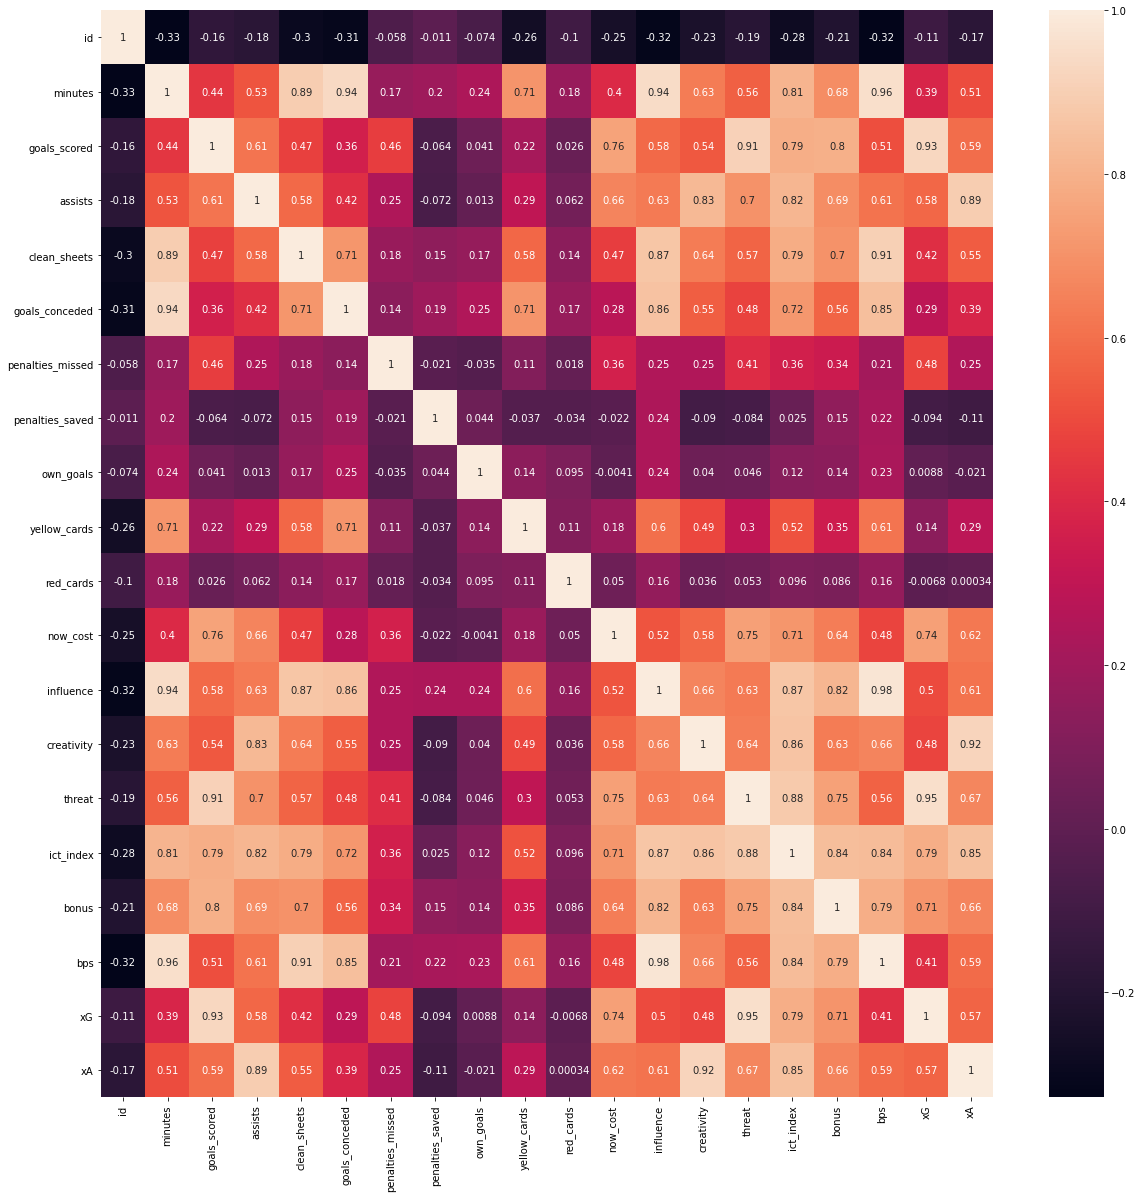

In [28]:
#calculating corrleation
corr_19_20 = season_stats_19_20_fully_modified.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_19_20,annot=True)

In [29]:
#removing players will less than 200 minutes ( outliers )
season_stats_20_21_fully_modified = season_stats_20_21_fully_modified[season_stats_20_21_fully_modified['minutes'] > 200]
season_stats_19_20_fully_modified = season_stats_19_20_fully_modified[season_stats_19_20_fully_modified['minutes'] > 200]

In [30]:
season_stats_19_20_fully_modified

,team,id,full_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,ict_index,bonus,bps,position,xG,xA
0,Brighton,534,Aaron Connolly,1250,3,3,5,22,0,0,0,0,0,4.2,150.6,91.4,530.0,76.0,5,146,FWD,4.55,0.56
1,West Ham,376,Aaron Cresswell,2727,3,0,5,51,0,0,0,7,0,4.5,535.4,441.0,180.0,115.9,5,444,DEF,1.03,3.01
2,Burnley,430,Aaron Lennon,485,0,0,0,15,0,0,0,4,0,4.6,45.0,37.8,12.0,9.6,0,51,MID,0.02,0.16
3,Brighton,516,Aaron Mooy,2079,2,2,6,33,0,0,0,1,1,4.7,436.6,614.9,291.0,134.0,9,337,MID,2.52,3.75
4,Bournemouth,494,Aaron Ramsdale,3330,0,1,5,62,0,1,0,0,0,4.4,973.8,24.0,0.0,99.7,13,680,GK,0.00,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,Newcastle United,260,Yoshinori Muto,207,0,0,0,7,0,0,0,0,0,5.1,12.6,15.4,12.0,3.7,0,25,FWD,0.08,0.01
661,Leicester,448,Youri Tielemans,2823,3,6,12,35,0,0,0,2,0,6.1,566.6,805.4,502.0,187.6,5,531,MID,2.79,5.19
662,Brighton,53,Yves Bissouma,1253,1,0,4,18,0,0,0,4,0,5.0,238.8,110.6,101.0,45.1,0,207,MID,0.41,0.14
664,Leicester,164,?aglar S?y?nc?,3036,1,1,12,35,0,0,0,4,1,4.9,755.6,79.0,238.0,107.5,12,681,DEF,1.43,0.31


In [31]:
team_filtered = season_stats_20_21_fully_modified['team']
full_name_filtered = season_stats_20_21_fully_modified['web_name']

In [32]:
#dropping needless columns
season_stats_19_20_fully_modified = season_stats_19_20_fully_modified.drop(['team','id','full_name'],axis=1)

In [33]:
#dropping needless columns
season_stats_20_21_fully_modified = season_stats_20_21_fully_modified.drop(['index','points_per_game','total_points','team','web_name'],axis=1)

In [34]:
season_stats_19_20_fully_modified.shape

(435, 20)

In [35]:
season_stats_20_21_fully_modified.shape

(431, 20)

In [36]:
#creating the train and test sets
X_train = season_stats_19_20_fully_modified.drop(['position'],axis=1)
y_train = season_stats_19_20_fully_modified['position']

X_test = season_stats_20_21_fully_modified.drop(['element_type'],axis=1)
y_test = season_stats_20_21_fully_modified['element_type']

In [37]:
from sklearn.ensemble import RandomForestClassifier

Rand_forr = RandomForestClassifier()
Rand_forr.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
predicted_position = Rand_forr.predict(X_test)

In [39]:
season_stats_20_21_fully_modified['predicted_position'] = predicted_position

In [40]:
#adding player names and team back
season_stats_20_21_fully_modified['team']=team_filtered
season_stats_20_21_fully_modified['name']=full_name_filtered

In [41]:
season_stats_20_21_fully_modified

,element_type,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,ict_index,bonus,bps,xG,xA,predicted_position,team,name
0,2,1396,1,0,3,20,0,0,0,1,1,5.4,250.6,46.7,144.0,43.9,0,230,0.67,0.52,DEF,1,David Luiz
1,3,2330,10,3,10,26,0,0,1,2,0,11.3,493.8,361.5,823.0,167.4,11,358,10.45,2.43,FWD,1,Aubameyang
2,2,744,0,1,2,11,0,0,0,1,0,4.6,110.8,114.8,66.0,29.2,3,125,0.2,0.89,MID,1,Cédric
3,4,1916,13,3,7,21,0,0,0,3,0,8.4,602.4,307.4,797.0,170.4,21,452,12.03,2.21,FWD,1,Lacazette
4,1,3131,0,0,11,37,0,1,1,0,1,5.0,702.2,0.0,2.0,70.3,11,625,0,0.00,GK,1,Leno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,3,509,0,1,0,8,0,0,0,0,0,4.7,80.0,179.0,72.0,33.3,0,112,0.66,0.72,MID,20,Vitinha
579,2,573,0,0,0,11,0,0,0,1,0,4.4,100.4,59.7,26.0,18.7,0,80,0.06,0.18,MID,20,Hoever
580,2,2983,1,3,9,45,0,0,1,5,0,5.1,595.2,412.9,297.0,130.7,11,548,1.31,0.90,DEF,20,Semedo
581,2,1400,1,1,3,23,0,0,0,1,0,5.0,243.2,234.5,196.0,67.4,6,264,0.51,0.79,MID,20,Ait Nouri


In [42]:
#mapping element_type_names
season_stats_20_21_fully_modified['element_type'] = season_stats_20_21_fully_modified['element_type'].map(element_type_names)

In [43]:
#dataframe for players with actual and predicted position
season_stats_20_21_position_compare = season_stats_20_21_fully_modified[['name','element_type','predicted_position']]

In [44]:
#number of players whose acutal and predicted postions dont match
len(season_stats_20_21_position_compare[season_stats_20_21_position_compare.element_type!=season_stats_20_21_position_compare.predicted_position])

101

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(season_stats_20_21_fully_modified['element_type'],predicted_position))
print(classification_report(season_stats_20_21_fully_modified['element_type'],predicted_position))
print(accuracy_score(season_stats_20_21_fully_modified['element_type'], predicted_position))

[[133   1   2  25]
 [  1  33   0  20]
 [  2   0  28   0]
 [ 34  16   0 136]]
              precision    recall  f1-score   support

         DEF       0.78      0.83      0.80       161
         FWD       0.66      0.61      0.63        54
          GK       0.93      0.93      0.93        30
         MID       0.75      0.73      0.74       186

    accuracy                           0.77       431
   macro avg       0.78      0.78      0.78       431
weighted avg       0.76      0.77      0.76       431

0.765661252900232


# Checking if the accuracy increases using RandomizedSearchcv

In [46]:
from sklearn.model_selection import RandomizedSearchCV

#The number of trees in the forest.
n_estimators = [int(i) for i in np.linspace(start=100 , stop=1200 , num=12)]
#The maximum depth of the tree.
max_depth= [int(i) for i in np.linspace(start=5 , stop=30 , num=6)]
#The minimum number of samples required to split an internal node
min_samples_split = [5, 10 , 15 , 20 , 50 , 100]
#The number of features to consider when looking for the best split
max_features = ["auto", "sqrt"]
#The minimum number of samples required to be at a leaf node.
min_samples_leaf =[2, 5, 10, 20]

In [47]:
random_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
               'min_samples_split':min_samples_split,
              'max_features':max_features,
              'min_samples_leaf':min_samples_leaf}

In [48]:
final_model = RandomizedSearchCV(estimator=Rand_forr,param_distributions=random_grid,scoring='accuracy',n_iter=10, cv=5,verbose=2,random_state=42,n_jobs=1)

In [49]:
final_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=20, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=20, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, 

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=300, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 20],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [50]:
final_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [51]:
# predicting position from test data
y_pred = final_model.predict(X_test)

In [52]:
#creating a dataframe with player name and position
season_stats_20_21_fully_modified_optimize = season_stats_20_21_fully_modified[['name','element_type']]

In [53]:
season_stats_20_21_fully_modified_optimize['predicted_position'] = y_pred

<ipython-input-53-d12c5a5f34ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats_20_21_fully_modified_optimize['predicted_position'] = y_pred


In [54]:
len(season_stats_20_21_fully_modified_optimize[season_stats_20_21_fully_modified_optimize.element_type!=season_stats_20_21_fully_modified_optimize.predicted_position])

94

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(season_stats_20_21_fully_modified_optimize['element_type'],y_pred))
print(classification_report(season_stats_20_21_fully_modified_optimize['element_type'],y_pred))
print(accuracy_score(season_stats_20_21_fully_modified_optimize['element_type'], y_pred))

[[135   0   2  24]
 [  1  34   0  19]
 [  2   0  28   0]
 [ 31  15   0 140]]
              precision    recall  f1-score   support

         DEF       0.80      0.84      0.82       161
         FWD       0.69      0.63      0.66        54
          GK       0.93      0.93      0.93        30
         MID       0.77      0.75      0.76       186

    accuracy                           0.78       431
   macro avg       0.80      0.79      0.79       431
weighted avg       0.78      0.78      0.78       431

0.7819025522041764


In [56]:
#list of players the model predicted out of position

season_stats_20_21_fully_modified_optimize[season_stats_20_21_fully_modified_optimize.element_type!=season_stats_20_21_fully_modified_optimize.predicted_position]

,name,element_type,predicted_position
1,Aubameyang,MID,FWD
2,Cédric,DEF,MID
7,Bellerín,DEF,MID
8,Chambers,DEF,MID
11,Pépé,MID,FWD
...,...,...,...
548,Soucek,MID,FWD
561,Moutinho,MID,DEF
577,Marçal,DEF,MID
579,Hoever,DEF,MID
